In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
import seaborn as sns

In [6]:
df=pd.read_csv('dataset/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

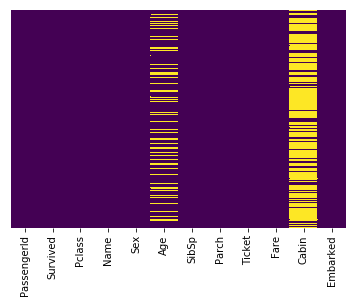

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

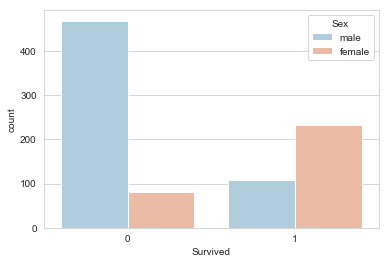

In [21]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')
plt.show()

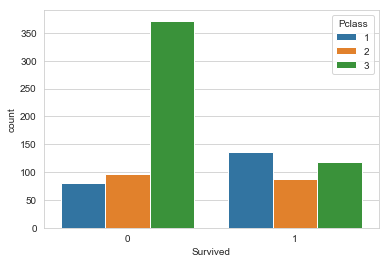

In [25]:
#no. of people who survived according to their Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.show()

In [31]:
df.Age.isnull().sum()

177

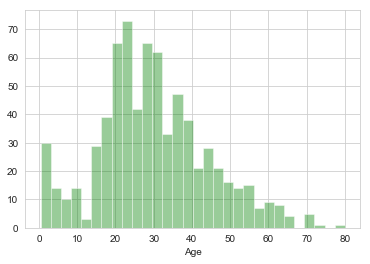

In [32]:
#distribution plot of age of the people
sns.distplot(df['Age'].dropna(), kde=False, bins=30, color='Green');

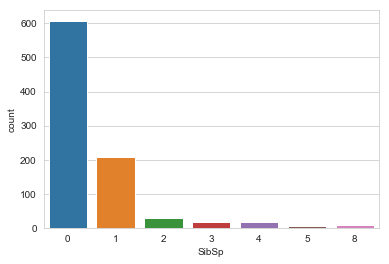

In [33]:
#countplot of the people having siblings or spouce
sns.countplot(x='SibSp',data=df);

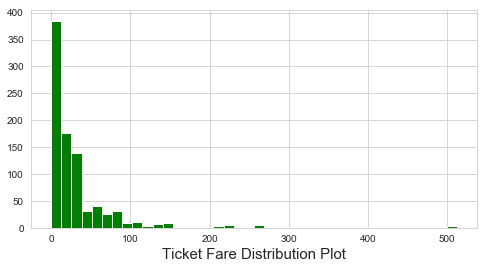

In [39]:
#distribution plot of the ticket fare
df['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.xlabel('Ticket Fare Distribution Plot',size=15)
plt.show()

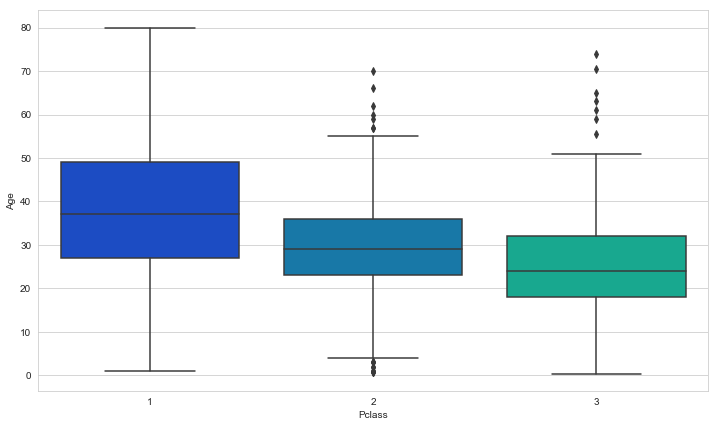

In [41]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')
plt.show()

In [42]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age

In [44]:
df['Age'].isnull().sum()

177

In [45]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

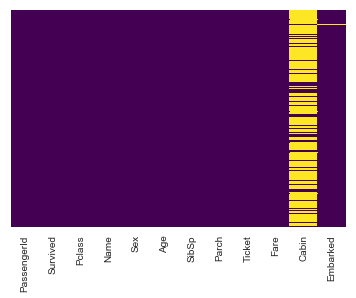

In [47]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [48]:
df.drop('Cabin',axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [51]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [54]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [55]:
#drop the sex,embarked,name and tickets columns
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [58]:
#concatenate new sex and embark column to our train dataframe
df = pd.concat([df,sex,embark],axis=1)

In [59]:
#check the head of dataframe
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [60]:
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

In [61]:
X_train.shape

(622, 9)

In [63]:
y_train.shape

(622,)

In [64]:
X_test.shape

(267, 9)

In [65]:
y_test.shape

(267,)

In [66]:
#create an instance and fit the model 
lgm = LogisticRegression()
lgm.fit(X_train, y_train)

C:\Users\vikas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
#predictions
Predictions = lgm.predict(X_test)

In [72]:
lgm.score(X_train,y_train)

0.797427652733119

In [73]:
lgm.score(X_test,y_test)

0.7827715355805244

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       160
           1       0.76      0.66      0.71       107

   micro avg       0.78      0.78      0.78       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

[[138  22]
 [ 36  71]]
